
Skewness of 'CO2 Emissions(g/km)': 0.53
Skipping Box-Cox (skewness within [-1,1]).


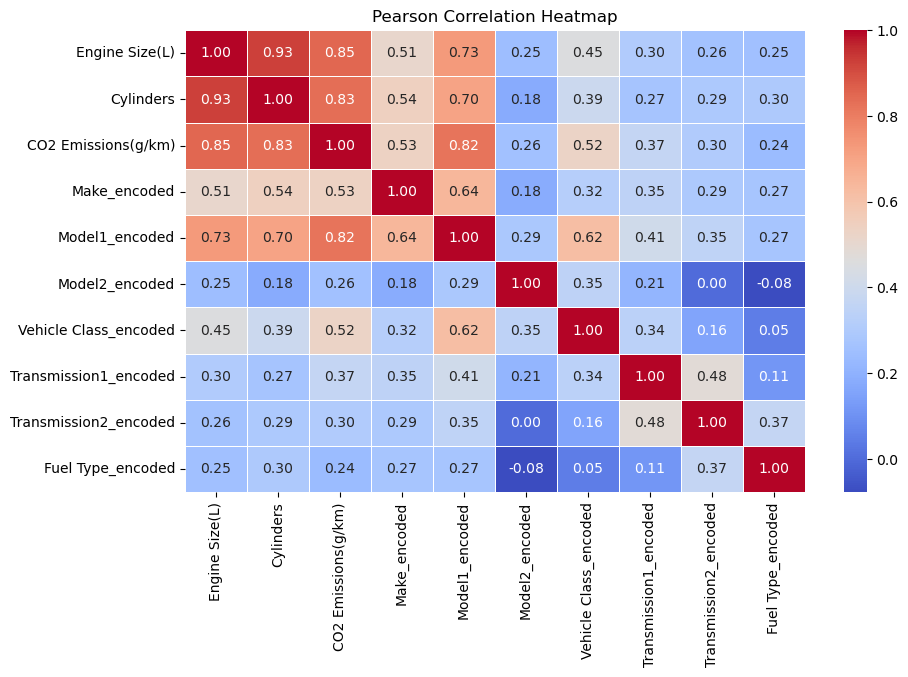

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.



Features remaining after removing collinearity (corr>0.9):
['Engine Size(L)', 'Model1_encoded', 'Make_encoded', 'Vehicle Class_encoded', 'Transmission1_encoded', 'Transmission2_encoded', 'Model2_encoded', 'Fuel Type_encoded']

Selected Features for Model (corr>0.7 w/ target):
['Engine Size(L)', 'Model1_encoded']

Shapes before Scaling:
X_train: (5908, 2) y_train: (5908,)
X_test:  (1477, 2) y_test:  (1477,)

After Standardization (X_train) Mean:
 Engine Size(L)   -1.268826e-16
Model1_encoded    8.740469e-16
dtype: float64

After Standardization (X_train) Std:
 Engine Size(L)    1.000085
Model1_encoded    1.000085
dtype: float64

Standardization applied.


wandb: Currently logged in as: yhanluo22 (yhanluo22-imperial-college-london) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



=== Hyperparams: alpha=0.1, l1_ratio=0.2 ===
  Fold 1: val MSE = 0.1799
  Fold 2: val MSE = 0.1918
  Fold 3: val MSE = 0.2082
  Fold 4: val MSE = 0.1886
  Fold 5: val MSE = 0.1989

Avg Val MSE for alpha=0.1, l1_ratio=0.2: 0.1935



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▁▄█▃▆
fold,5
overall_val_mse,0.19348
val_mse,0.19889



=== Hyperparams: alpha=0.1, l1_ratio=0.5 ===
  Fold 1: val MSE = 0.1825
  Fold 2: val MSE = 0.1936
  Fold 3: val MSE = 0.2104
  Fold 4: val MSE = 0.1912
  Fold 5: val MSE = 0.2014

Avg Val MSE for alpha=0.1, l1_ratio=0.5: 0.1958



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▁▄█▃▆
fold,5
overall_val_mse,0.19581
val_mse,0.20143



=== Hyperparams: alpha=0.1, l1_ratio=0.8 ===
  Fold 1: val MSE = 0.1858
  Fold 2: val MSE = 0.1962
  Fold 3: val MSE = 0.2132
  Fold 4: val MSE = 0.1944
  Fold 5: val MSE = 0.2047

Avg Val MSE for alpha=0.1, l1_ratio=0.8: 0.1989



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▁▄█▃▆
fold,5
overall_val_mse,0.19887
val_mse,0.20468



=== Hyperparams: alpha=1.0, l1_ratio=0.2 ===
  Fold 1: val MSE = 0.3664
  Fold 2: val MSE = 0.3593
  Fold 3: val MSE = 0.3898
  Fold 4: val MSE = 0.3818
  Fold 5: val MSE = 0.3886

Avg Val MSE for alpha=1.0, l1_ratio=0.2: 0.3772



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▃▁█▆█
fold,5
overall_val_mse,0.37717
val_mse,0.38858



=== Hyperparams: alpha=1.0, l1_ratio=0.5 ===
  Fold 1: val MSE = 0.5645
  Fold 2: val MSE = 0.5462
  Fold 3: val MSE = 0.5851
  Fold 4: val MSE = 0.5864
  Fold 5: val MSE = 0.5879

Avg Val MSE for alpha=1.0, l1_ratio=0.5: 0.5740



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▄▁███
fold,5
overall_val_mse,0.57401
val_mse,0.58788



=== Hyperparams: alpha=1.0, l1_ratio=0.8 ===
  Fold 1: val MSE = 0.9154
  Fold 2: val MSE = 0.8864
  Fold 3: val MSE = 0.9402
  Fold 4: val MSE = 0.9566
  Fold 5: val MSE = 0.9506

Avg Val MSE for alpha=1.0, l1_ratio=0.8: 0.9299



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▄▁▆█▇
fold,5
overall_val_mse,0.92986
val_mse,0.95058



=== Hyperparams: alpha=10.0, l1_ratio=0.2 ===
  Fold 1: val MSE = 0.9898
  Fold 2: val MSE = 0.9641
  Fold 3: val MSE = 1.0109
  Fold 4: val MSE = 1.0204
  Fold 5: val MSE = 1.0169

Avg Val MSE for alpha=10.0, l1_ratio=0.2: 1.0004



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▄▁▇██
fold,5
overall_val_mse,1.00043
val_mse,1.01695



=== Hyperparams: alpha=10.0, l1_ratio=0.5 ===
  Fold 1: val MSE = 0.9898
  Fold 2: val MSE = 0.9641
  Fold 3: val MSE = 1.0109
  Fold 4: val MSE = 1.0204
  Fold 5: val MSE = 1.0169

Avg Val MSE for alpha=10.0, l1_ratio=0.5: 1.0004



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▄▁▇██
fold,5
overall_val_mse,1.00043
val_mse,1.01695



=== Hyperparams: alpha=10.0, l1_ratio=0.8 ===
  Fold 1: val MSE = 0.9898
  Fold 2: val MSE = 0.9641
  Fold 3: val MSE = 1.0109
  Fold 4: val MSE = 1.0204
  Fold 5: val MSE = 1.0169

Avg Val MSE for alpha=10.0, l1_ratio=0.8: 1.0004



fold,▁▃▅▆█
overall_val_mse,▁
val_mse,▄▁▇██
fold,5
overall_val_mse,1.00043
val_mse,1.01695



Best hyperparams found: {'alpha': 0.1, 'l1_ratio': 0.2, 'k_folds': 5}
Best val MSE: 0.19347539717248136



Final Test MSE: 0.1446
Final R² Score: 0.8563


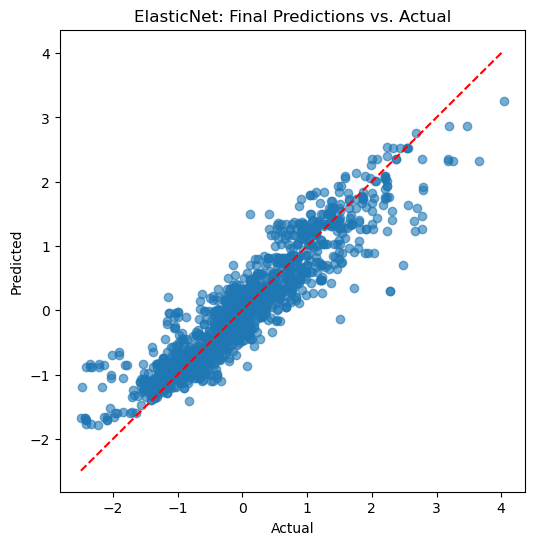

Final Test MSE,▁
Final Test R2,▁
Final Test MSE,0.1446
Final Test R2,0.85628


Done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox, skew

import warnings
warnings.filterwarnings("ignore")

# Weights & Biases (optional)
import wandb
from itertools import product

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 1: Load and Split Data -------------------------
# ----------------------------------------------------------------------------
file_path = "Processed_CO2_Emissions_Canada.csv"  # Change to your CSV path
data_df = pd.read_csv(file_path)

# Define numerical and categorical features
numeric_features = [
    "Engine Size(L)",
    "Cylinders"
]
categorical_features = ["Make", "Model1", "Model2", "Vehicle Class", "Transmission1", "Transmission2", "Fuel Type"]
target = "CO2 Emissions(g/km)"  # Name of your target column

data_df = data_df[categorical_features + numeric_features + [target]]

# Train-test split
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 2: K-Fold Target Encoding ----------------------
# ----------------------------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_encoded_df = train_df.copy()
for cat in categorical_features:
    train_encoded_df[f"{cat}_encoded"] = np.nan
    for train_idx, val_idx in kf.split(train_df):
        fold_train = train_df.iloc[train_idx]
        target_mean = fold_train.groupby(cat)[target].mean()
        valid_idx = train_encoded_df.index.intersection(val_idx)
        train_encoded_df.loc[valid_idx, f"{cat}_encoded"] = (
            train_df.loc[valid_idx, cat].map(target_mean)
        )
    # Fill any missing with overall mean of the target
    train_encoded_df[f"{cat}_encoded"].fillna(train_df[target].mean(), inplace=True)

test_encoded_df = test_df.copy()
for cat in categorical_features:
    overall_mapping = train_df.groupby(cat)[target].mean()
    test_encoded_df[f"{cat}_encoded"] = test_df[cat].map(overall_mapping)
    test_encoded_df[f"{cat}_encoded"].fillna(train_df[target].mean(), inplace=True)

# Drop original categorical columns
train_encoded_df.drop(columns=categorical_features, inplace=True)
test_encoded_df.drop(columns=categorical_features, inplace=True)

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 3: (Optional) Box-Cox Transformation -----------
# ----------------------------------------------------------------------------
skewness_value = skew(train_df[target])
apply_boxcox = False if -1 <= skewness_value <= 1 else True

print(f"\nSkewness of '{target}': {skewness_value:.2f}")
if apply_boxcox:
    print("Applying Box-Cox transformation...")
    train_encoded_df[target], lambda_value = boxcox(train_encoded_df[target] + 1)
    test_encoded_df[target] = boxcox(test_encoded_df[target] + 1, lmbda=lambda_value)

    # Plot before and after
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(train_df[target], bins=30, kde=True, ax=ax[0])
    ax[0].set_title("Original Target Distribution")
    sns.histplot(train_encoded_df[target], bins=30, kde=True, ax=ax[1])
    ax[1].set_title(f"Box-Cox Target (λ = {lambda_value:.2f})")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Box-Cox (skewness within [-1,1]).")

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 4: Correlation-based Feature Removal -----------
# ----------------------------------------------------------------------------
correlation_matrix = train_encoded_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

# 1) Remove features that are highly correlated with each other (> 0.9)
corr_threshold_remove = 0.9

# Sort by absolute correlation with target
sorted_features = correlation_matrix[target].abs().sort_values(ascending=False).index.tolist()
sorted_features.remove(target)

selected_features = []
for col in sorted_features:
    drop_flag = False
    for kept in selected_features:
        if abs(correlation_matrix.loc[col, kept]) > corr_threshold_remove:
            drop_flag = True
            break
    if not drop_flag:
        selected_features.append(col)

print("\nFeatures remaining after removing collinearity (corr>0.9):")
print(selected_features)

# 2) Keep only features that have correlation > 0.7 with the target
corr_threshold_keep = 0.7
high_corr_features = [
    f for f in selected_features
    if abs(correlation_matrix[target][f]) > corr_threshold_keep
]

print("\nSelected Features for Model (corr>0.7 w/ target):")
print(high_corr_features)

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 5: Final Feature/Target Split ------------------
# ----------------------------------------------------------------------------
X_train_raw = train_encoded_df[high_corr_features]
y_train_raw = train_encoded_df[target]
X_test_raw  = test_encoded_df[high_corr_features]
y_test_raw  = test_encoded_df[target]

print("\nShapes before Scaling:")
print("X_train:", X_train_raw.shape, "y_train:", y_train_raw.shape)
print("X_test: ", X_test_raw.shape,  "y_test: ", y_test_raw.shape)

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 6: Standardize Data (Optional) -----------------
# ----------------------------------------------------------------------------
apply_standardization = True

if apply_standardization:
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train_raw)
    X_test_scaled  = scaler_X.transform(X_test_raw)
    
    # Optional: scale the target as well
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train_raw.values.reshape(-1, 1))
    y_test_scaled  = scaler_y.transform(y_test_raw.values.reshape(-1, 1))
    
    X_train_final = X_train_scaled
    X_test_final  = X_test_scaled
    y_train_final = y_train_scaled.ravel()  # flatten for ElasticNet
    y_test_final  = y_test_scaled.ravel()
    
    # For reference:
    X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train_raw.index, columns=X_train_raw.columns)
    print("\nAfter Standardization (X_train) Mean:\n", X_train_scaled_df.mean())
    print("\nAfter Standardization (X_train) Std:\n",  X_train_scaled_df.std())
    
    print("\nStandardization applied.")
else:
    X_train_final = X_train_raw.values
    X_test_final  = X_test_raw.values
    y_train_final = y_train_raw.values
    y_test_final  = y_test_raw.values
    
    print("\nNo Standardization applied.")

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 7: Hyperparameter Tuning (ElasticNet) ----------
# ----------------------------------------------------------------------------
# Example hyperparameter ranges for ElasticNet
# (Adjust or expand as needed)
alpha_options = [0.1, 1.0, 10.0]
l1_ratios = [0.2, 0.5, 0.8]

k_folds = 5
random_state = 42

best_val_loss = float('inf')
best_hyperparams = None
results = []

# Start KFold
outer_kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

for (alpha_val, l1_val) in product(alpha_options, l1_ratios):
    # Start a wandb run (remove if not using wandb)
    run_id = wandb.util.generate_id()
    wandb.init(
        project="elasticnet-kfold-hyperparameter-sweep",
        id=run_id,
        config={
            "alpha": alpha_val,
            "l1_ratio": l1_val,
            "k_folds": k_folds
        },
        reinit=True
    )
    
    print(f"\n=== Hyperparams: alpha={alpha_val}, l1_ratio={l1_val} ===")
    
    fold_losses = []
    for fold_idx, (train_idx, val_idx) in enumerate(outer_kf.split(X_train_final)):
        X_train_fold = X_train_final[train_idx]
        y_train_fold = y_train_final[train_idx]
        
        X_val_fold = X_train_final[val_idx]
        y_val_fold = y_train_final[val_idx]
        
        # Create and fit the ElasticNet model
        model = ElasticNet(alpha=alpha_val, l1_ratio=l1_val, random_state=random_state)
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on validation fold
        val_preds = model.predict(X_val_fold)
        fold_mse = mean_squared_error(y_val_fold, val_preds)
        
        fold_losses.append(fold_mse)
        
        # Log fold metrics
        wandb.log({
            "fold": fold_idx+1,
            "val_mse": fold_mse
        })
        
        print(f"  Fold {fold_idx+1}: val MSE = {fold_mse:.4f}")
    
    # Average MSE across folds
    avg_mse = np.mean(fold_losses)
    wandb.log({"overall_val_mse": avg_mse})
    print(f"\nAvg Val MSE for alpha={alpha_val}, l1_ratio={l1_val}: {avg_mse:.4f}\n")
    
    # Keep track of best
    if avg_mse < best_val_loss:
        best_val_loss = avg_mse
        best_hyperparams = wandb.config
    
    results.append(((alpha_val, l1_val), avg_mse))
    wandb.finish()

print("\nBest hyperparams found:", best_hyperparams)
print("Best val MSE:", best_val_loss)

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 8: Train Final Model on Full Train ------------
# ----------------------------------------------------------------------------
wandb.init(project="elasticnet-kfold-hyperparameter-sweep", name="final_evaluation",
           config=best_hyperparams, reinit=True)

final_alpha   = best_hyperparams["alpha"]
final_l1_ratio= best_hyperparams["l1_ratio"]

final_model = ElasticNet(alpha=final_alpha, l1_ratio=final_l1_ratio, random_state=random_state)
final_model.fit(X_train_final, y_train_final)

# ----------------------------------------------------------------------------
# -------------------- 📌 Step 9: Evaluate on Test Set ------------------------
# ----------------------------------------------------------------------------
test_preds = final_model.predict(X_test_final)
mse_val = mean_squared_error(y_test_final, test_preds)
r2_val  = r2_score(y_test_final, test_preds)

print(f"\nFinal Test MSE: {mse_val:.4f}")
print(f"Final R² Score: {r2_val:.4f}")

wandb.log({"Final Test MSE": mse_val, "Final Test R2": r2_val})

# Plot predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test_final, test_preds, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("ElasticNet: Final Predictions vs. Actual")
mn, mx = min(y_test_final), max(y_test_final)
plt.plot([mn, mx], [mn, mx], color="red", linestyle="--")
plt.show()

wandb.finish()
print("Done.")
